In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14

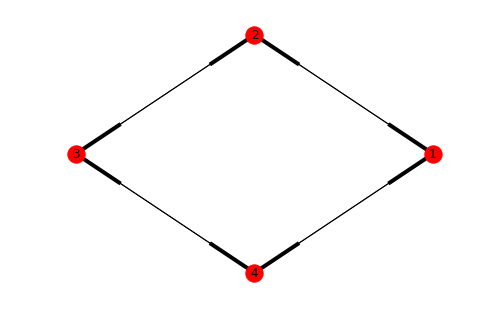

In [3]:
num_individuals = 4
L = util.create_circle_graph(num_individuals)
util.draw_circle_graph(L, directed=True)
graph_filename = "circlegraph"
graphname = "Circle"

## Simulations

In [4]:
x0 = np.zeros([num_individuals, 1])
sigma = np.zeros([num_individuals, 1])
T = 10
dt = 0.001
def compute_discrepancy(beta, leader_indices):
    num_leaders = len(leader_betas)
    x = util.run_simulation(x0, beta, L, dt, sigma, T)
    return util.compute_network_discrepancy(x, beta, leader_indices, L)
#     discrepancies = np.empty([num_leaders, x.shape[1]])
#     for i in range(num_leaders):
#         discrepancies[i,:] = [np.abs(leader_betas[i]) * util.compute_discrepancy(x[:,t], leader_indices[i] - 1, L) / np.sum(np.abs(leader_betas)) for t in range(x.shape[1])]
#    return np.sum(discrepancies, axis=0)

[None, None]

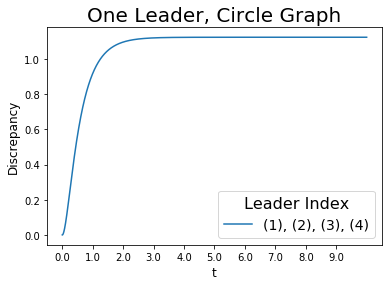

In [5]:
ds = np.empty([num_individuals, int(T / dt)])
for i in range(num_individuals):
    leader_betas = [2]
    leader_indices = [i+1]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    ds[i,:] = compute_discrepancy(beta, leader_indices)
plt.close()
util.plot_unique_trajectories(ds, range(num_individuals))
plt.title("One Leader, %s Graph" % graphname, fontsize=title_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)

plt.xlabel("t", fontsize=axis_fontsize)
num_timesteps = int(T / dt)
xtick_spacing = int(num_timesteps / 10)
t_vals = np.arange(0, T, xtick_spacing * dt)
plt.xticks(range(0, num_timesteps, xtick_spacing), t_vals)
legend = plt.legend(title='Leader Index', loc='lower right', ncol=1, fontsize = legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
#plt.savefig("../Figures/discrepancies_%sexample_oneleader.png" % graph_filename, bbox_inches="tight")

In [6]:
ds[:,-1]

array([ 1.125,  1.125,  1.125,  1.125])

[None, None]

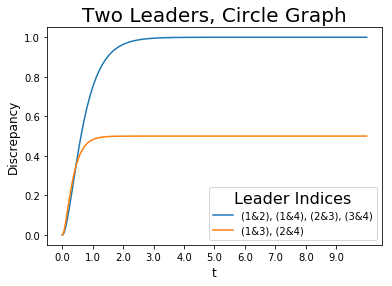

In [7]:
num_pairs = int(num_individuals * (num_individuals - 1) / 2)
ds = np.empty([num_pairs, int(T / dt)])
ds_index = 0
labels = []
for i in range(num_individuals):
    for j in range(i+1, num_individuals):
        leader_indices = [i+1, j+1]
        leader_betas = [2, 2]
        beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
        ds[ds_index,:] = compute_discrepancy(beta, leader_indices)
        ds_index += 1
        labels.append("%d&%d" % (i+1, j+1))
plt.close()
util.plot_unique_trajectories(ds, range(num_pairs), labels=labels)
plt.title("Two Leaders, %s Graph" % graphname, fontsize=title_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.xlabel("t", fontsize=axis_fontsize)
num_timesteps = int(T / dt)
xtick_spacing = int(num_timesteps / 10)
t_vals = np.arange(0, T, xtick_spacing * dt)
plt.xticks(range(0, num_timesteps, xtick_spacing), t_vals)
legend = plt.legend(title='Leader Indices', loc='lower right', ncol=1, fontsize = legendlabel_fontsize-4)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
#plt.savefig("../Figures/discrepancies_%sexample_twoleaders.png" % graph_filename, bbox_inches="tight")